In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [14]:
# Generate sample data
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 20)
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 20)
X = X[:, np.newaxis]



In [15]:
# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

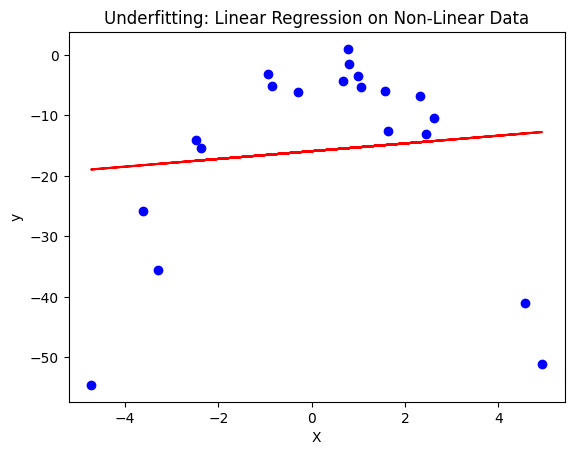

In [16]:
# Plotting
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Underfitting: Linear Regression on Non-Linear Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
# Generate polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [19]:
# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)
y_poly_pred = model.predict(X_poly)


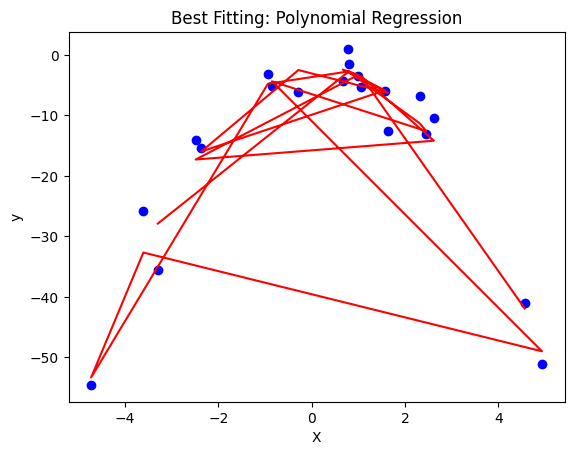

In [20]:
# Plotting
plt.scatter(X, y, color='blue')
plt.plot(X, y_poly_pred, color='red')
plt.title('Best Fitting: Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [21]:
# Generate polynomial features
poly_high = PolynomialFeatures(degree=15)
X_poly_high = poly_high.fit_transform(X)

In [22]:
# Fit high-degree polynomial regression model
model = LinearRegression()
model.fit(X_poly_high, y)
y_poly_high_pred = model.predict(X_poly_high)

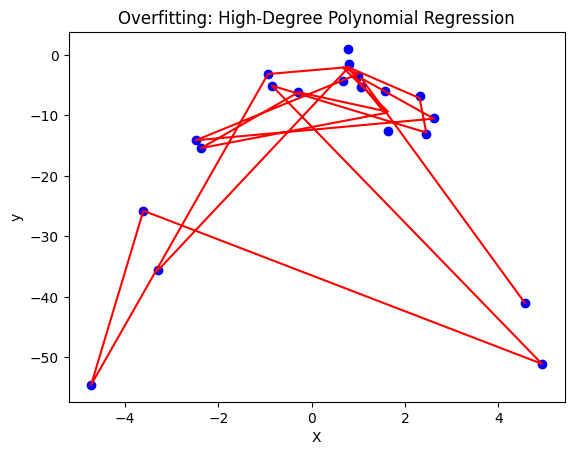

In [23]:
# Plotting
plt.scatter(X, y, color='blue')
plt.plot(X, y_poly_high_pred, color='red')
plt.title('Overfitting: High-Degree Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

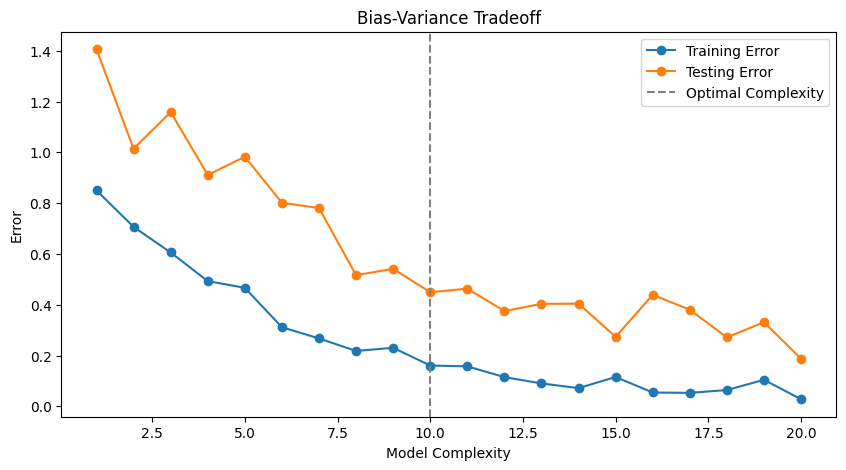

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for visualization
complexity = np.arange(1, 21)
train_error = np.exp(-complexity / 5) + 0.1 * np.random.rand(len(complexity))
test_error = np.exp(-complexity / 10) + 0.3 * np.random.rand(len(complexity)) + 0.5 / (complexity + 1)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(complexity, train_error, label='Training Error', marker='o')
plt.plot(complexity, test_error, label='Testing Error', marker='o')
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.axvline(x=10, color='gray', linestyle='--', label='Optimal Complexity')
plt.legend()
plt.show()

Overfitting

C:\Users\mahen\AppData\Local\Temp\ipykernel_27720\2279485824.py:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  curve_x = np.arange(min(x), max(x), 0.01)


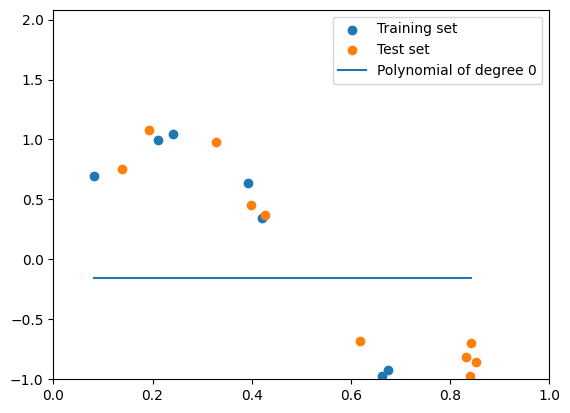

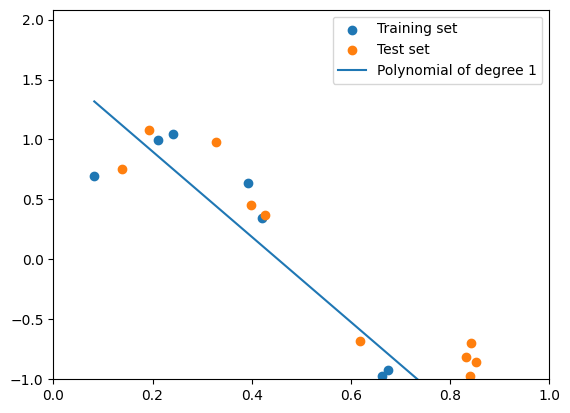

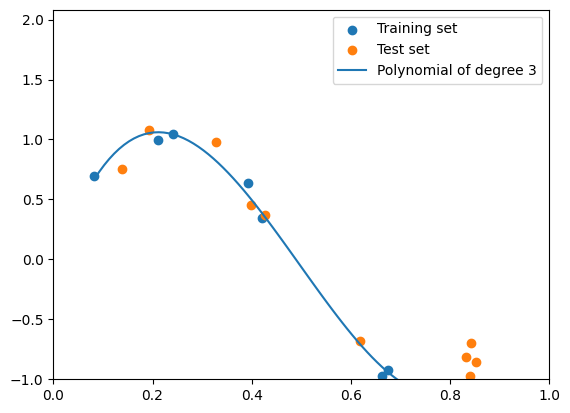

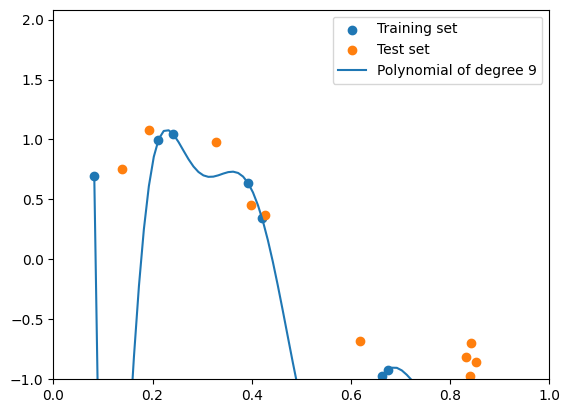

MSE (Train, Degree 0): 0.8368912339950725
MSE (Test, Degree 0): 0.6435237106184033
MSE (Train, Degree 1): 0.08010967985156067
MSE (Test, Degree 1): 0.1838991755524982
MSE (Train, Degree 3): 0.0024253116472302268
MSE (Test, Degree 3): 0.030086941550294122
MSE (Train, Degree 9): 1.9955223172061868e-19
MSE (Test, Degree 9): 11.064747964172224


In [12]:
import math
%matplotlib inline

# Generating data
x = np.random.uniform(0, 1, 20)
N = np.random.normal(loc=0.0, scale=1.0, size=20)
y = np.sin(2*np.pi*x) + (0.1 * N)

# Function to split the dataset
def split_dataset(n, val_percent):
    n_val = int(n * val_percent)
    idxs = np.random.permutation(n)
    return idxs[n_val:], idxs[:n_val]

train_set, val_set = split_dataset(len(x), 0.5)
train_x = []
train_y = []
test_x = []
test_y = []

# Creating training and testing sets
for i in train_set:
    train_x.append(x[i])
    train_y.append(y[i])
for i in val_set:
    test_x.append(x[i])
    test_y.append(y[i])

train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

np.random.seed(1)

# Function to fit polynomial and return model
def polynomial_fitFunction(deg=1, train1=train_x, train2=train_y):
    model = np.polyfit(train1, train2, deg)
    return model

# Function to plot polynomial fit
def plot_polyfit(deg=1, train1=train_x, train2=train_y, test1=test_x, test2=test_y):
    coeff = polynomial_fitFunction(deg, train1, train2)
    p = np.poly1d(coeff)
    plt.scatter(train1, train2, label="Training set")
    plt.scatter(test1, test2, label="Test set")
    curve_x = np.arange(min(x), max(x), 0.01)
    plt.plot(curve_x, p(curve_x), label="Polynomial of degree {}".format(deg))
    plt.xlim((0, 1))
    plt.ylim((-1, np.max(y)+1.0))
    plt.legend()
    plt.show()
    return coeff

# Fit and plot polynomials of different degrees
model_0 = plot_polyfit(0)
model_1 = plot_polyfit(1)
model_3 = plot_polyfit(3)
model_9 = plot_polyfit(9)

# Function to calculate Mean Squared Error
def calculate_mse(model, x, y):
    p = np.poly1d(model)
    predictions = p(x)
    mse = np.mean((predictions - y)**2)
    return mse

# Calculating errors for each model
mse_train_0 = calculate_mse(model_0, train_x, train_y)
mse_test_0 = calculate_mse(model_0, test_x, test_y)
mse_train_1 = calculate_mse(model_1, train_x, train_y)
mse_test_1 = calculate_mse(model_1, test_x, test_y)
mse_train_3 = calculate_mse(model_3, train_x, train_y)
mse_test_3 = calculate_mse(model_3, test_x, test_y)
mse_train_9 = calculate_mse(model_9, train_x, train_y)
mse_test_9 = calculate_mse(model_9, test_x, test_y)

print(f'MSE (Train, Degree 0): {mse_train_0}')
print(f'MSE (Test, Degree 0): {mse_test_0}')
print(f'MSE (Train, Degree 1): {mse_train_1}')
print(f'MSE (Test, Degree 1): {mse_test_1}')
print(f'MSE (Train, Degree 3): {mse_train_3}')
print(f'MSE (Test, Degree 3): {mse_test_3}')
print(f'MSE (Train, Degree 9): {mse_train_9}')
print(f'MSE (Test, Degree 9): {mse_test_9}')
